In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Вы планируете посмотреть какой-то фильм. Можете ли Вы доверять онлайн-рейтингам и отзывам о фильмах? Особенно если та компания, которая занимается рейтингами и отзывами, также зарабатывает на продаже билетов на фильмы. Есть ли у таких компаний тенденция выдавать завышенные или заниженные рейтинги?

Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье. Вы будете применять Ваши навыки работы с pandas и навыки визуализации данных для того, чтобы определить, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.

### Данные

Исходные данные для статьи Be Suspicious Of Online Movie Ratings, Especially Fandango’s находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

In [44]:
fandango = pd.read_csv("fandango_scrape.csv")

In [45]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [46]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [47]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

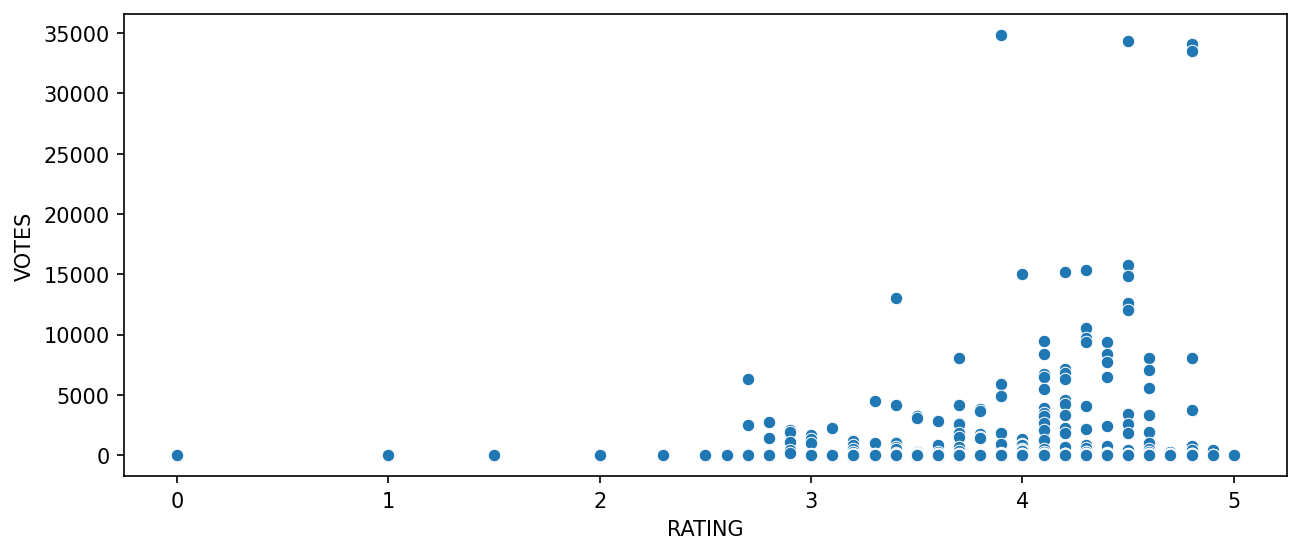

In [48]:
plt.figure(figsize=(10,4), dpi = 150)
sns.scatterplot(data = fandango , y = 'VOTES' , x = 'RATING')

In [49]:
fandango.corr() # ВЫЧИСЛЕНИЕ КОРРЕЛЯЦИИ СРЕДИ ГОЛОСОВ

/var/folders/yb/jf4_vg517clfj2xz26rr9kkr0000gn/T/ipykernel_2534/1197971558.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr() # ВЫЧИСЛЕНИЕ КОРРЕЛЯЦИИ СРЕДИ ГОЛОСОВ


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Создаем новую колонку YEAR 

In [50]:
title = "Название фильма (Год)"

In [51]:
title.split("(")[-1].replace(")","")

'Год'

In [52]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split("(")[-1].replace(")",""))

In [53]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


Разбивка фильмов по годам 

In [54]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

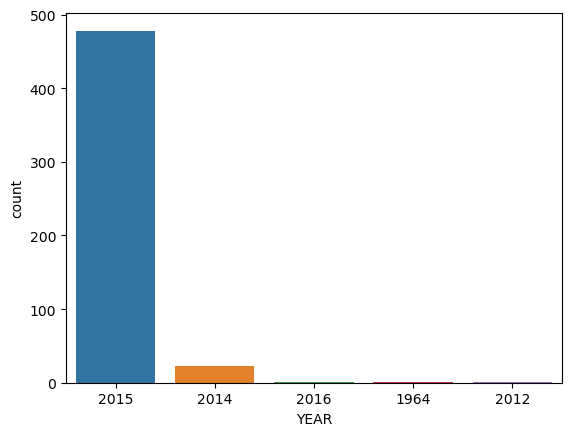

In [55]:
sns.countplot(data = fandango , x = 'YEAR')

10 фильмов получившие наибольшее количество голосов

In [56]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [57]:
no_votes = fandango['VOTES']==0

In [58]:
no_votes.sum()

69

  ## Создаем DataFrame только с  фильмами которые имеют положительное  количество голосов ( +1) 

In [59]:
fan_reviewed = fandango[fandango['VOTES']>0]

In [60]:
fan_reviewed


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


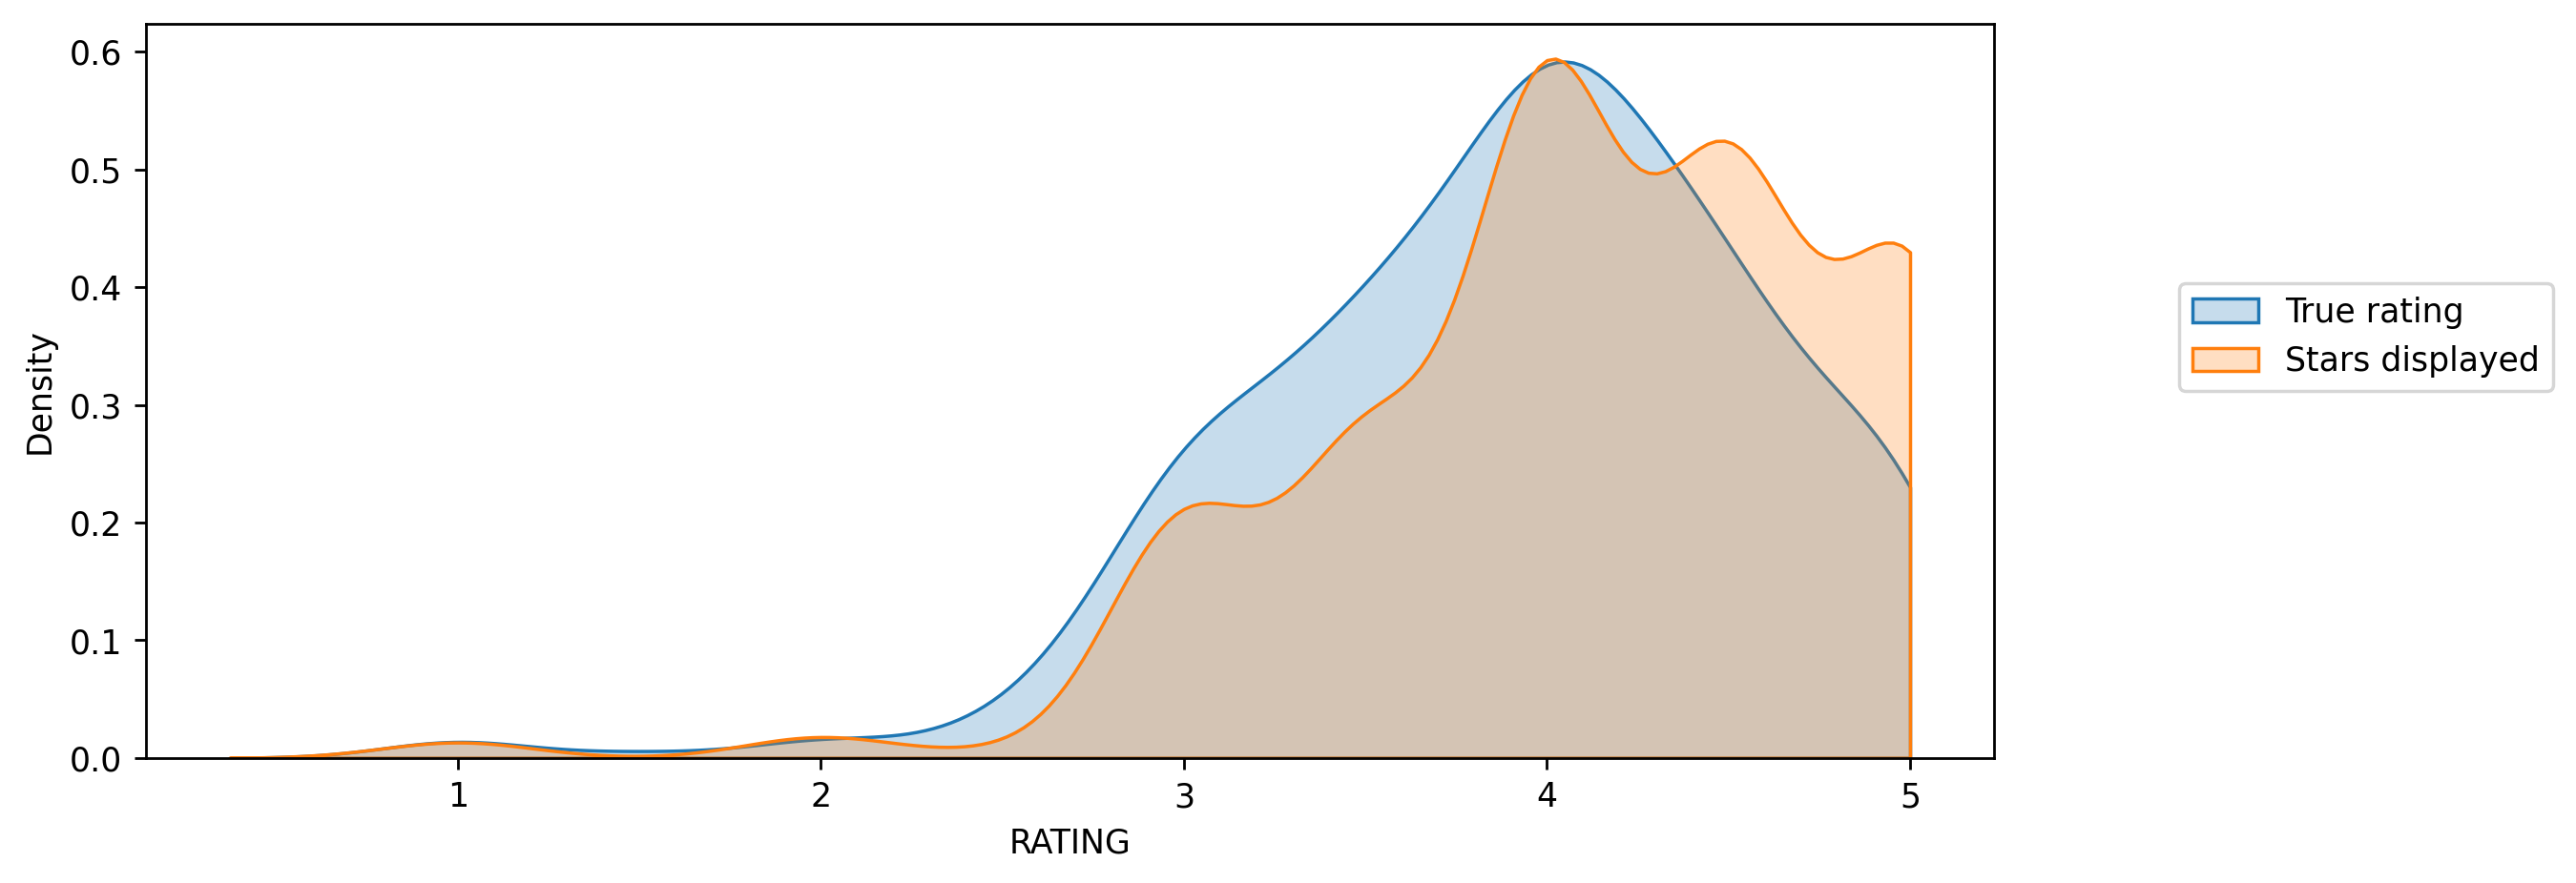

In [61]:
plt.figure(figsize=(10,4), dpi = 250)
sns.kdeplot(data = fan_reviewed , x = 'RATING', clip = [0,5] , fill = True, label = 'True rating')
sns.kdeplot(data = fan_reviewed , x = 'STARS', clip = [0,5] , fill = True, label = 'Stars displayed')

plt.legend(loc=(1.1,0.5))

In [62]:
fan_reviewed['Difference'] = fan_reviewed['STARS']-fan_reviewed['RATING']

/var/folders/yb/jf4_vg517clfj2xz26rr9kkr0000gn/T/ipykernel_2534/4122477778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['Difference'] = fan_reviewed['STARS']-fan_reviewed['RATING']


In [64]:
fan_reviewed['Difference'] = fan_reviewed['Difference'].round(1)

/var/folders/yb/jf4_vg517clfj2xz26rr9kkr0000gn/T/ipykernel_2534/3708130143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['Difference'] = fan_reviewed['Difference'].round(1)


In [65]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,Difference
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<Axes: xlabel='Difference', ylabel='count'>

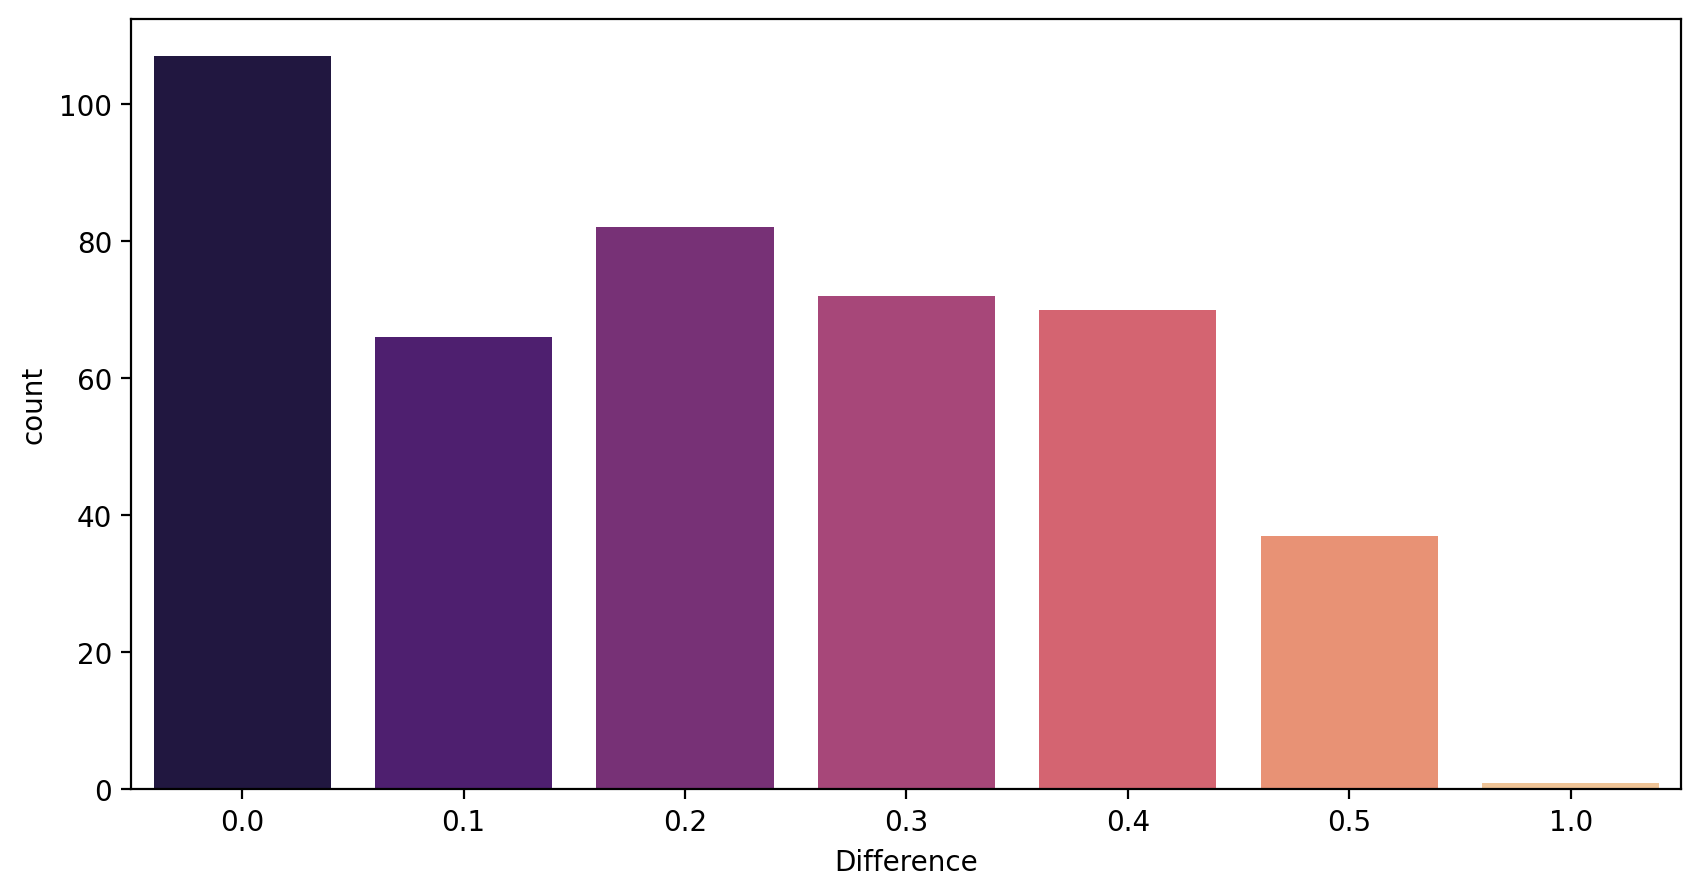

In [66]:
plt.figure(figsize =(10,5), dpi = 200)
sns.countplot(data = fan_reviewed , x = 'Difference' , palette = 'magma')

In [67]:
fan_reviewed[fan_reviewed['Difference']==1]

,FILM,STARS,RATING,VOTES,YEAR,Difference
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний

In [68]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [69]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [70]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [71]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Рейтинги от Rotten Tomatoes
Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги.

Text(0.5, 1.0, 'Difference between Critics ratings and Users ratings')

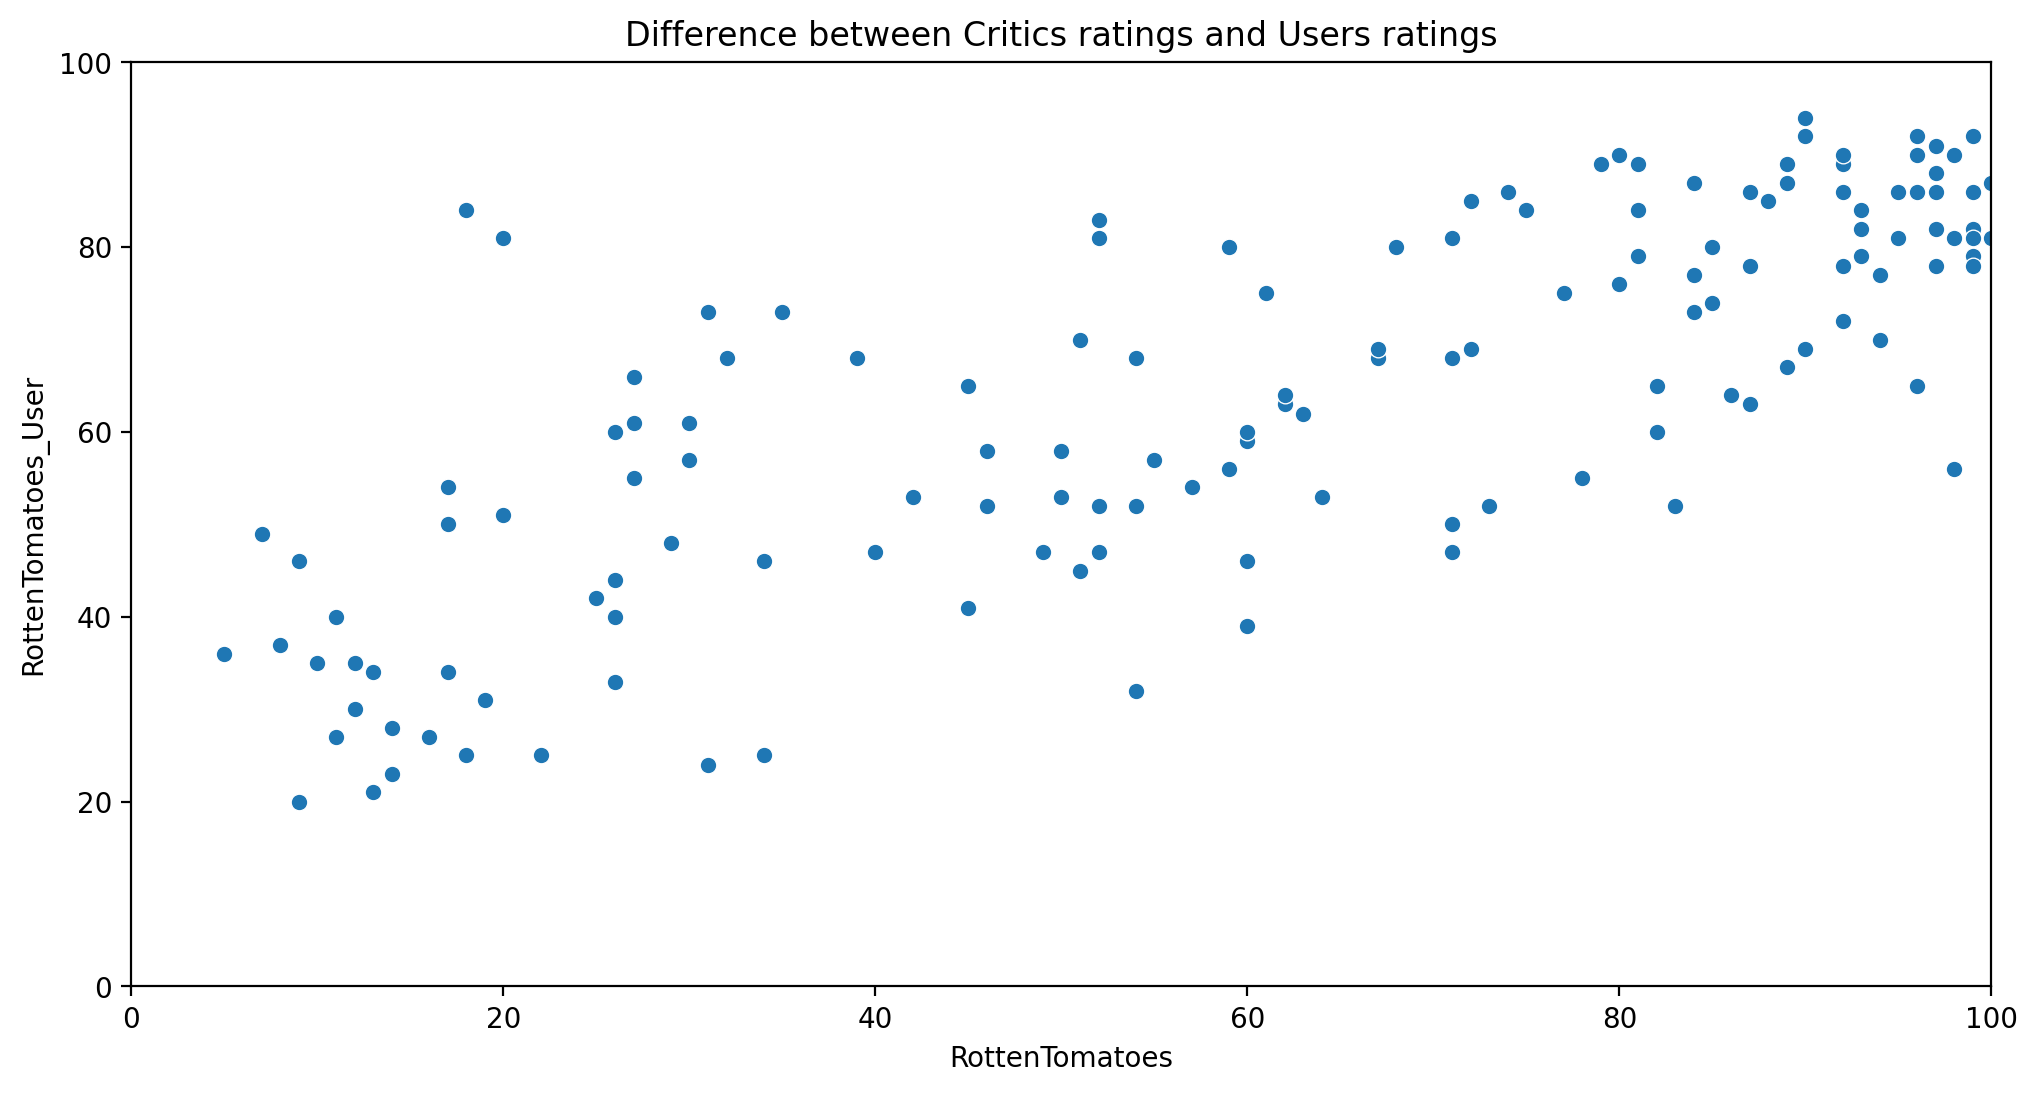

In [72]:
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(data = all_sites , x = 'RottenTomatoes' , y = 'RottenTomatoes_User')

plt.ylim(0,100)
plt.xlim(0,100)
plt.title("Difference between Critics ratings and Users ratings")

Мы посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.


In [73]:
all_sites['RottenDiff'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [74]:
all_sites['RottenDiff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: RottenDiff, Length: 146, dtype: int64

Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

In [75]:
all_sites['RottenDiff'].apply(abs).mean()

15.095890410958905

Text(0.5, 1.0, 'RT critics score minus RT users score')

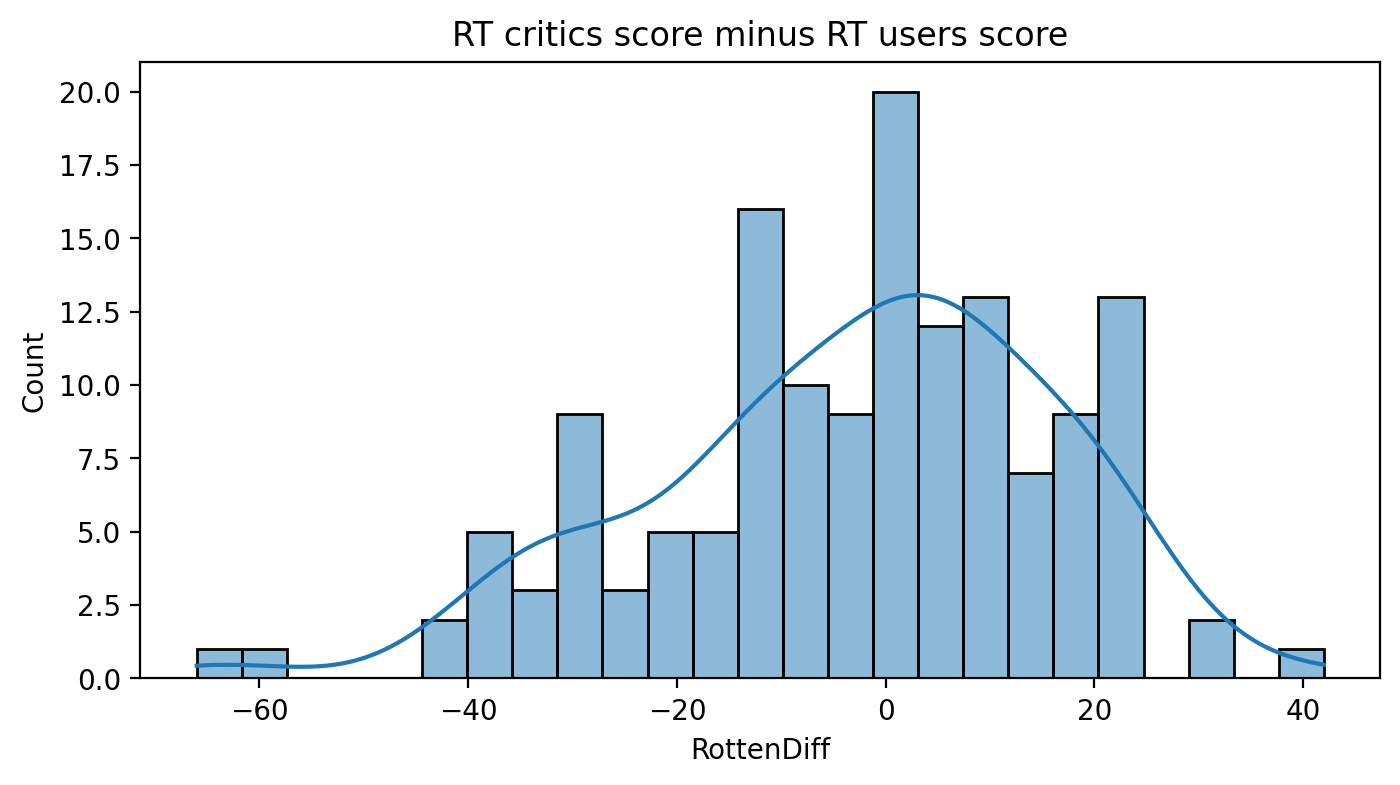

In [76]:
plt.figure(figsize=(8,4), dpi = 200)
sns.histplot(data = all_sites, x = 'RottenDiff', kde = True , bins = 25)
plt.title("RT critics score minus RT users score")

Text(0.5, 1.0, 'Abs difference between RT critics score and RT users score')

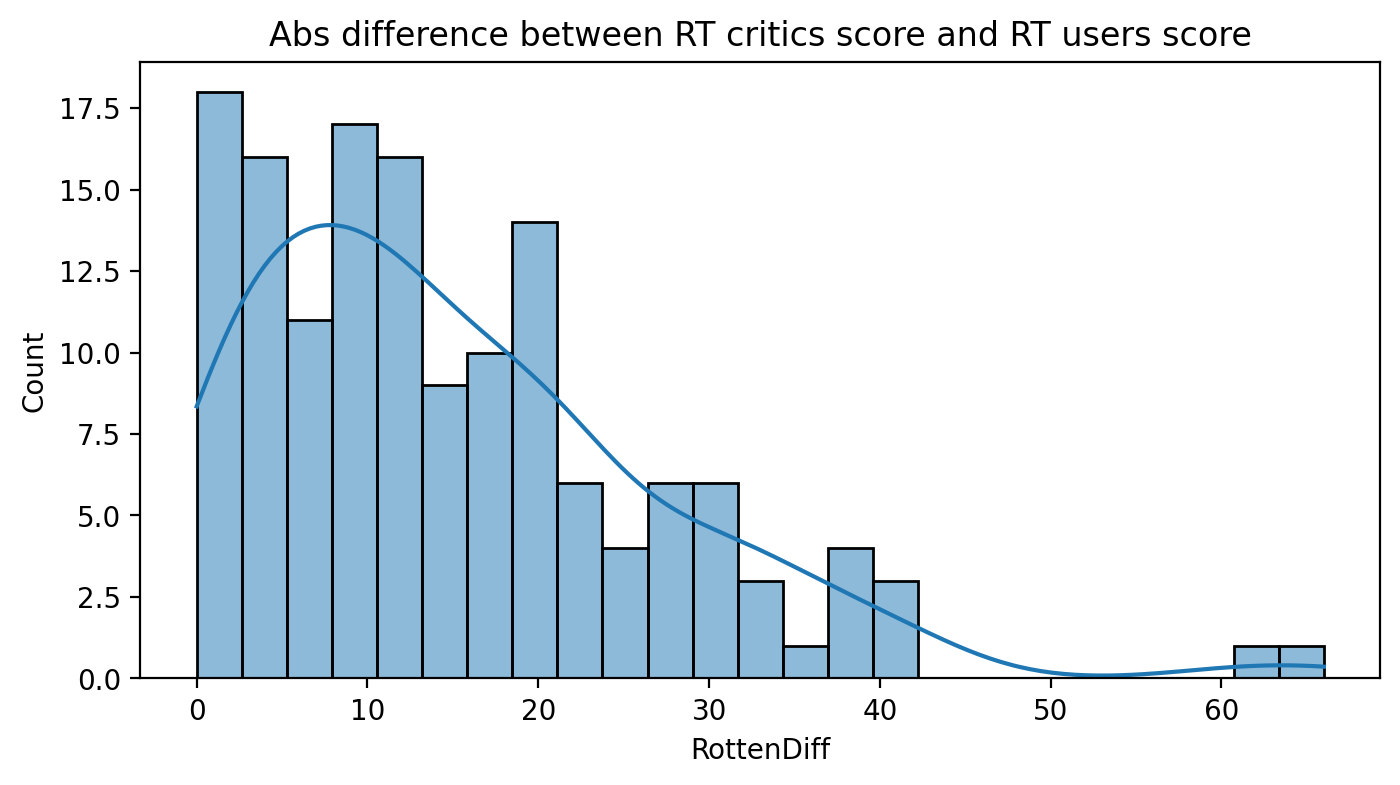

In [77]:
plt.figure(figsize=(8,4), dpi = 200)
sns.histplot(x = all_sites['RottenDiff'].apply(abs), kde = True , bins = 25)
plt.title("Abs difference between RT critics score and RT users score")

Давайте выясним, какие фильмы наиболее отличаются по рейтингам. Сначала выведите 5 фильмов с наибольшей по модулю отрицательной разницей рейтингов. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.

In [78]:
all_sites.nsmallest(5, 'RottenDiff')[['FILM','RottenDiff']]

,FILM,RottenDiff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [79]:
all_sites.nlargest(5,'RottenDiff')[['FILM','RottenDiff']]

,FILM,RottenDiff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## Рейтинги от MetaCritic

(0.0, 100.0)

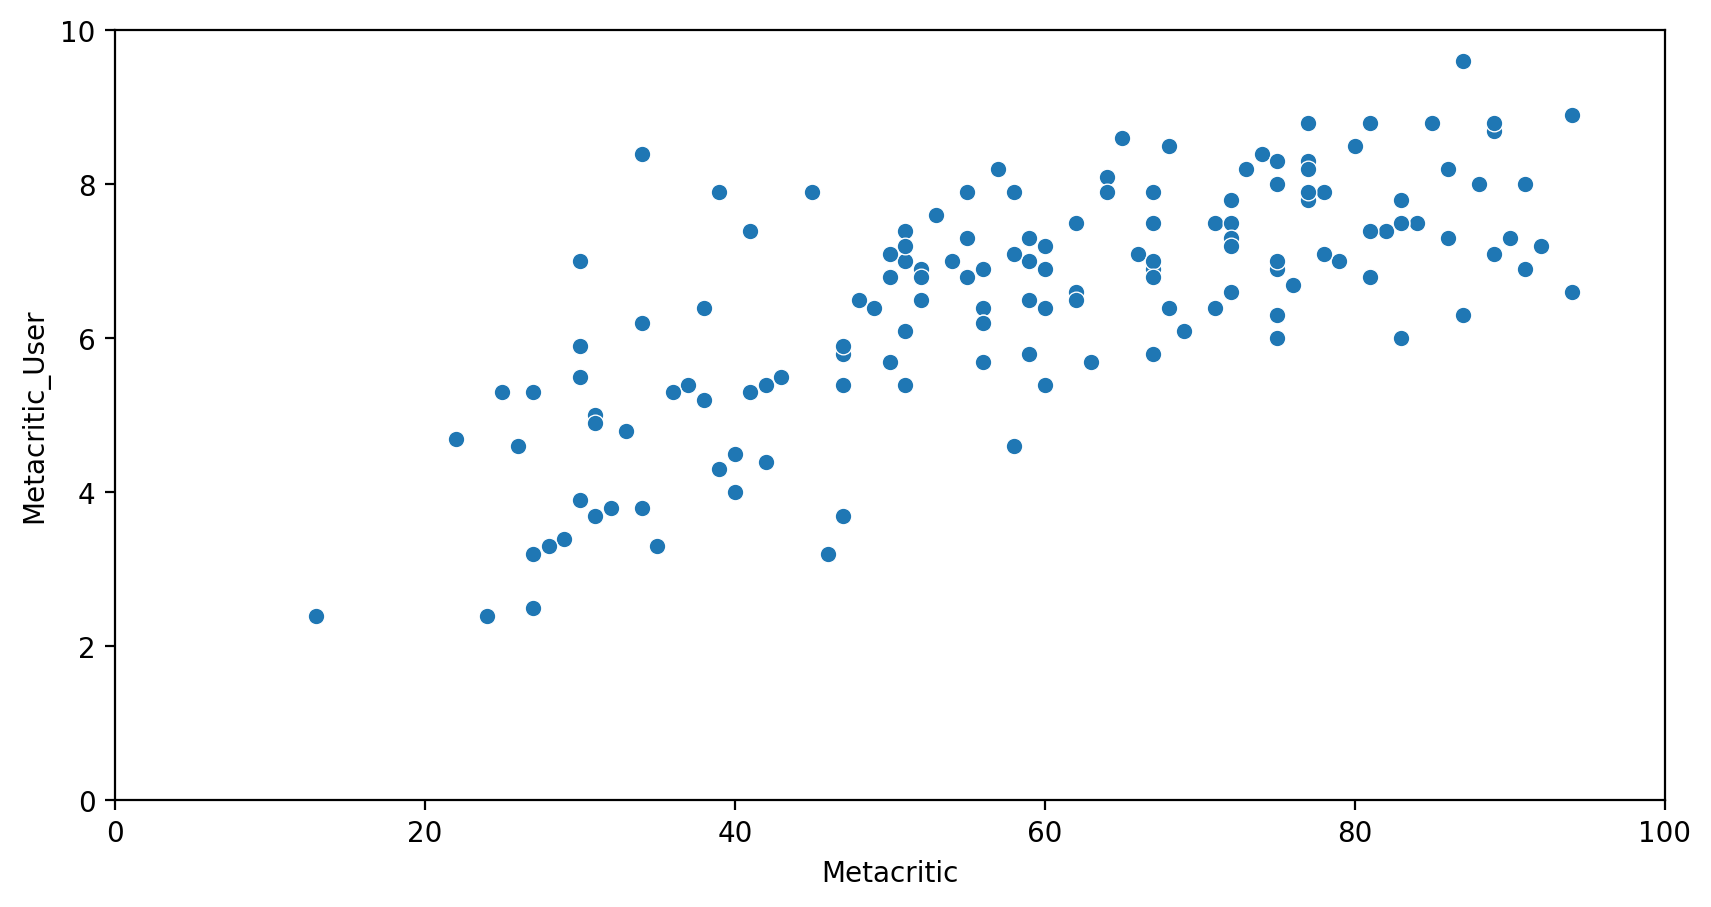

In [80]:
plt.figure(figsize=(10,5),dpi = 200)
sns.scatterplot(data = all_sites ,x = 'Metacritic' , y = 'Metacritic_User' )
plt.ylim(0,10)
plt.xlim(0,100)

## Рейтинги от IMDB

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

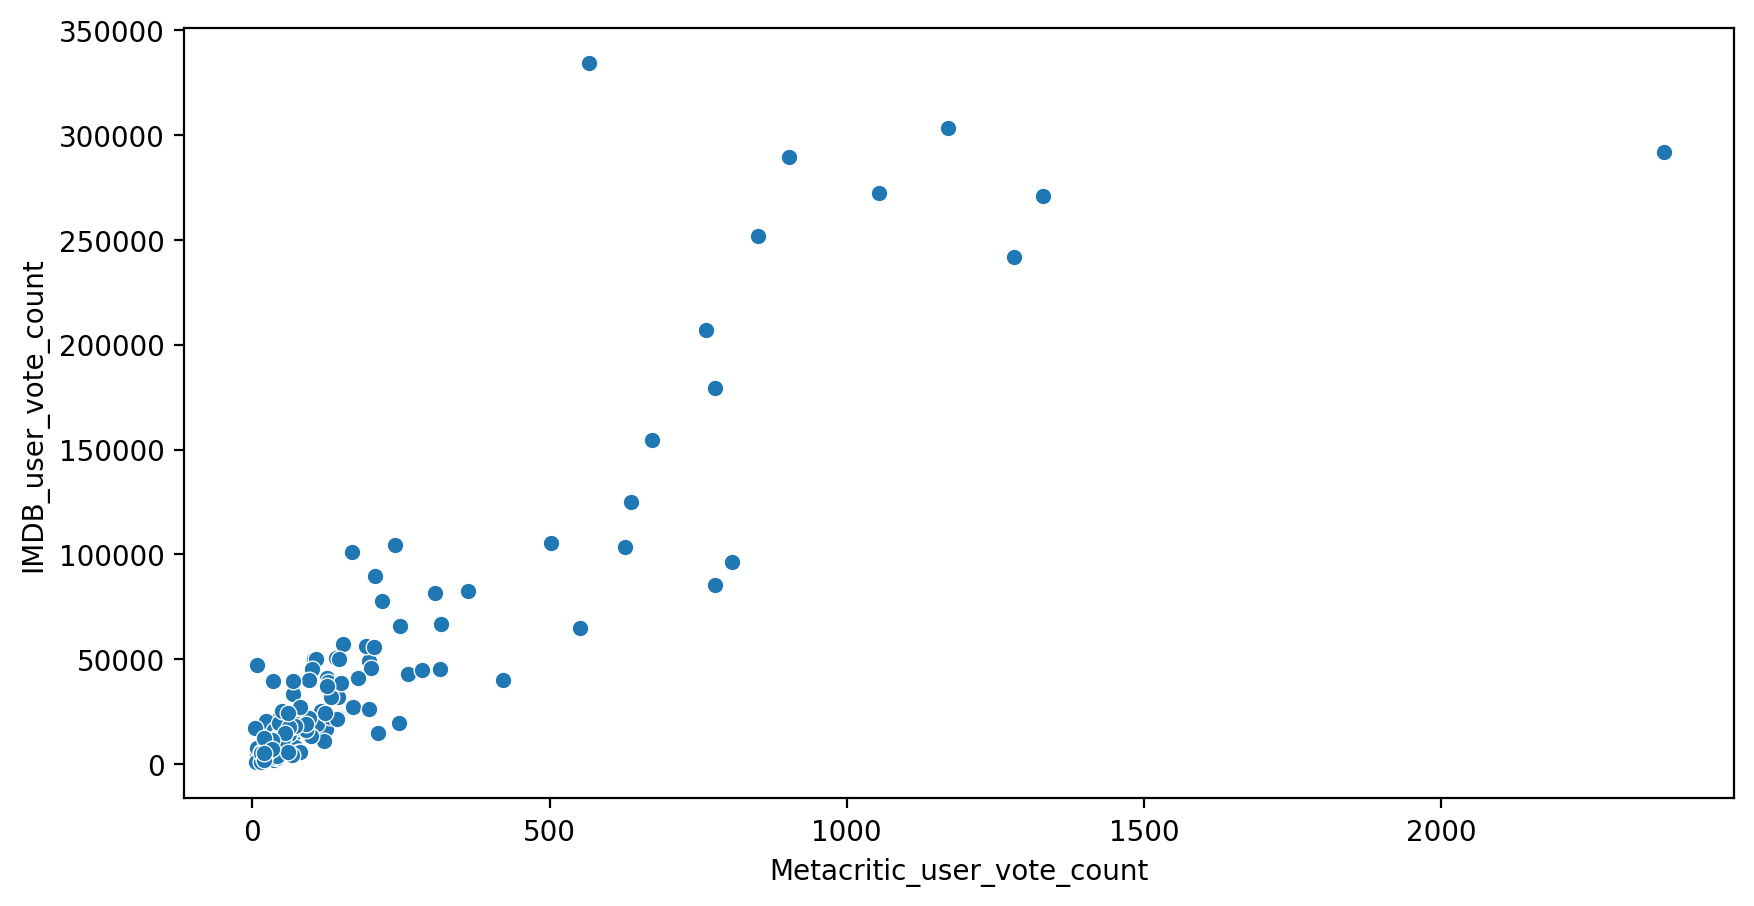

In [81]:
plt.figure(figsize=(10,5),dpi = 200)
sns.scatterplot(data = all_sites ,x = 'Metacritic_user_vote_count' , y = 'IMDB_user_vote_count' )


In [82]:
all_sites['IMDB_user_vote_count'].nlargest(1)

14    334164
Name: IMDB_user_vote_count, dtype: int64

In [83]:
all_sites['IMDB_user_vote_count'].iloc[14]

334164

In [84]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [85]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Сравнение рейтингов Fandango с рейтингами других компаний

Являются ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

In [86]:
df =pd.merge(fandango , all_sites, on="FILM" , how = "inner")

In [91]:
df["RottenTomatoes"].iloc[1:5]<88

1     True
2     True
3     True
4    False
Name: RottenTomatoes, dtype: bool

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RottenDiff                  145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [94]:
df.describe()

,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

In [99]:
df['RT_NORM_']= np.round(df['RottenTomatoes']/20, 1)
df['RT_User_NORM_']= np.round(df['RottenTomatoes_User']/20, 1)

In [100]:
df['MT_NORM_']= np.round(df['Metacritic']/20, 1)
df['MT_User_NORM_']= np.round(df['Metacritic_User']/2, 1)

In [101]:
df['IMDB_NORM_']= np.round(df['IMDB']/2, 1)

In [102]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
RottenDiff                        42.0
RT_NORM_                           5.0
RT_User_NORM_                      4.7
MT_NORM_                           4.7
MT_User_NORM_                      4.8
IMDB_NORM_                         4.3
Name: max, dtype: float64

In [108]:
df['IMDB'].value_counts().iloc[0:15]

7.2    10
6.6     9
6.3     9
7.4     8
7.8     8
6.9     7
7.1     7
6.7     7
6.4     6
7.5     6
7.3     5
5.5     5
6.5     4
7.7     4
8.2     4
Name: IMDB, dtype: int64

In [109]:
df['IMDB'].nlargest(10)

4      8.6
18     8.4
119    8.4
12     8.3
95     8.2
107    8.2
124    8.2
137    8.2
20     8.1
91     8.0
Name: IMDB, dtype: float64

In [110]:
df['IMDB'].iloc[4]

8.6

In [111]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,Difference
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [112]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [113]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff,RT_NORM_,RT_User_NORM_,MT_NORM_,MT_User_NORM_,IMDB_NORM_
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


In [116]:
fandango.iloc[4]

FILM      Inside Out (2015)
STARS                   4.5
RATING                  4.5
VOTES                 15749
YEAR                   2015
Name: 4, dtype: object

DataFrame с названием norm_scores, в котором  только нормализованные рейтинги. Также колонки STARS и RATING из исходной таблицы fandango.

In [117]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'RottenDiff',
       'RT_NORM_', 'RT_User_NORM_', 'MT_NORM_', 'MT_User_NORM_', 'IMDB_NORM_'],
      dtype='object')

In [119]:
norm_scores = df[['STARS','RATING','RT_NORM_', 'RT_User_NORM_', 'MT_NORM_', 'MT_User_NORM_', 'IMDB_NORM_']]

In [120]:
norm_scores

,STARS,RATING,RT_NORM_,RT_User_NORM_,MT_NORM_,MT_User_NORM_,IMDB_NORM_
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


### Сравнение распределений рейтингов от разных компаний

https://github.com/mwaskom/seaborn/issues/2280

In [151]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

/var/folders/yb/jf4_vg517clfj2xz26rr9kkr0000gn/T/ipykernel_2534/191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


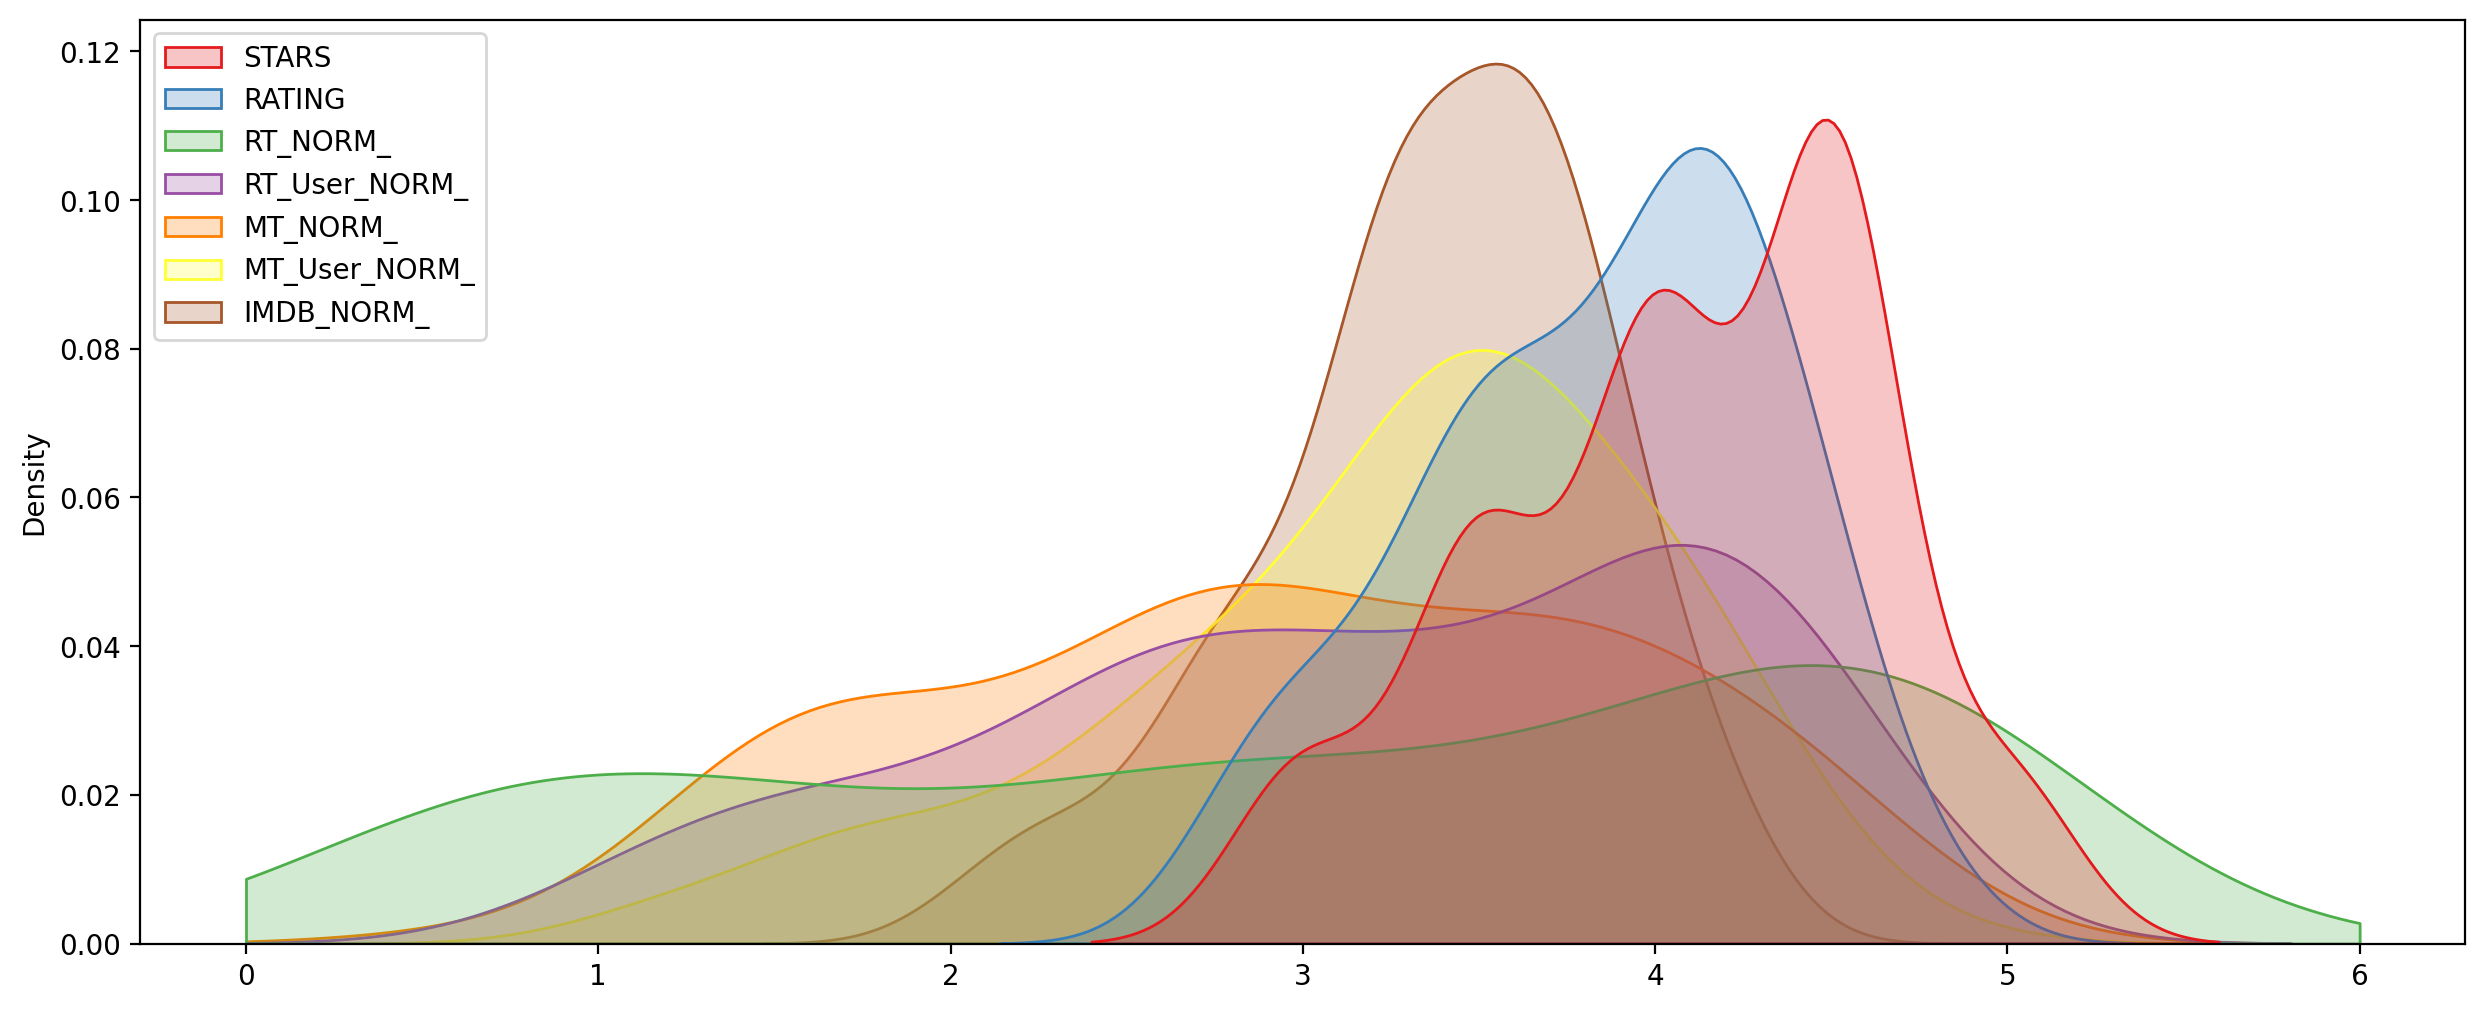

In [152]:
fig, ax =plt.subplots(figsize=(15,6),dpi = 200)

sns.kdeplot(data = norm_scores, fill=True, palette='Set1', clip=[0,6])
move_legend(ax, "upper left")

Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.

/var/folders/yb/jf4_vg517clfj2xz26rr9kkr0000gn/T/ipykernel_2534/191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


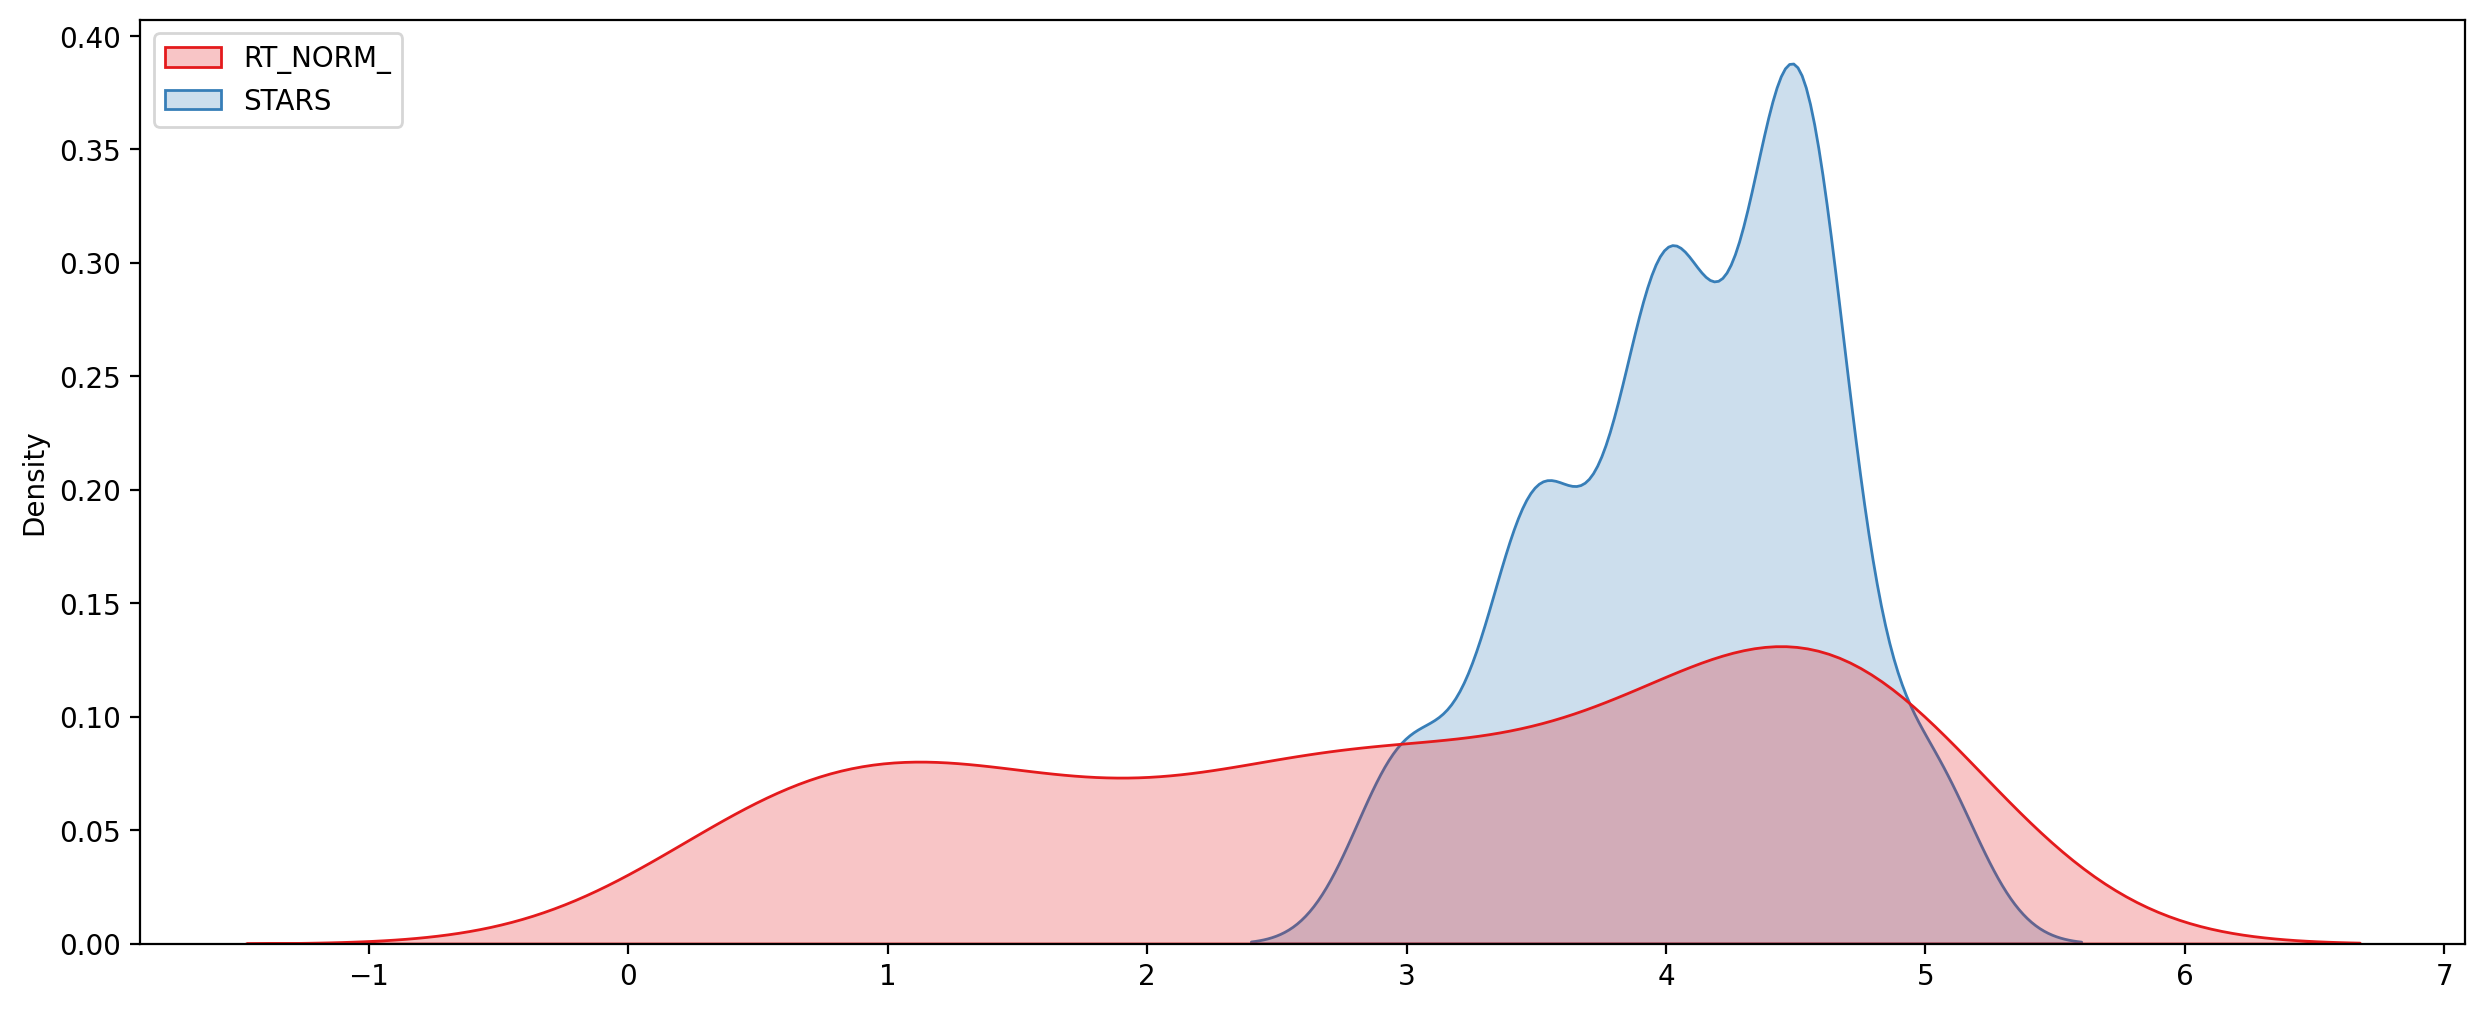

In [155]:
fig, ax =plt.subplots(figsize=(15,6),dpi = 200)

sns.kdeplot(data = norm_scores[['RT_NORM_','STARS']], fill=True, palette='Set1')

move_legend(ax, "upper left")

In [154]:
print(norm_scores.columns)


Index(['STARS', 'RATING', 'RT_NORM_', 'RT_User_NORM_', 'MT_NORM_',
       'MT_User_NORM_', 'IMDB_NORM_'],
      dtype='object')


<Axes: ylabel='Count'>

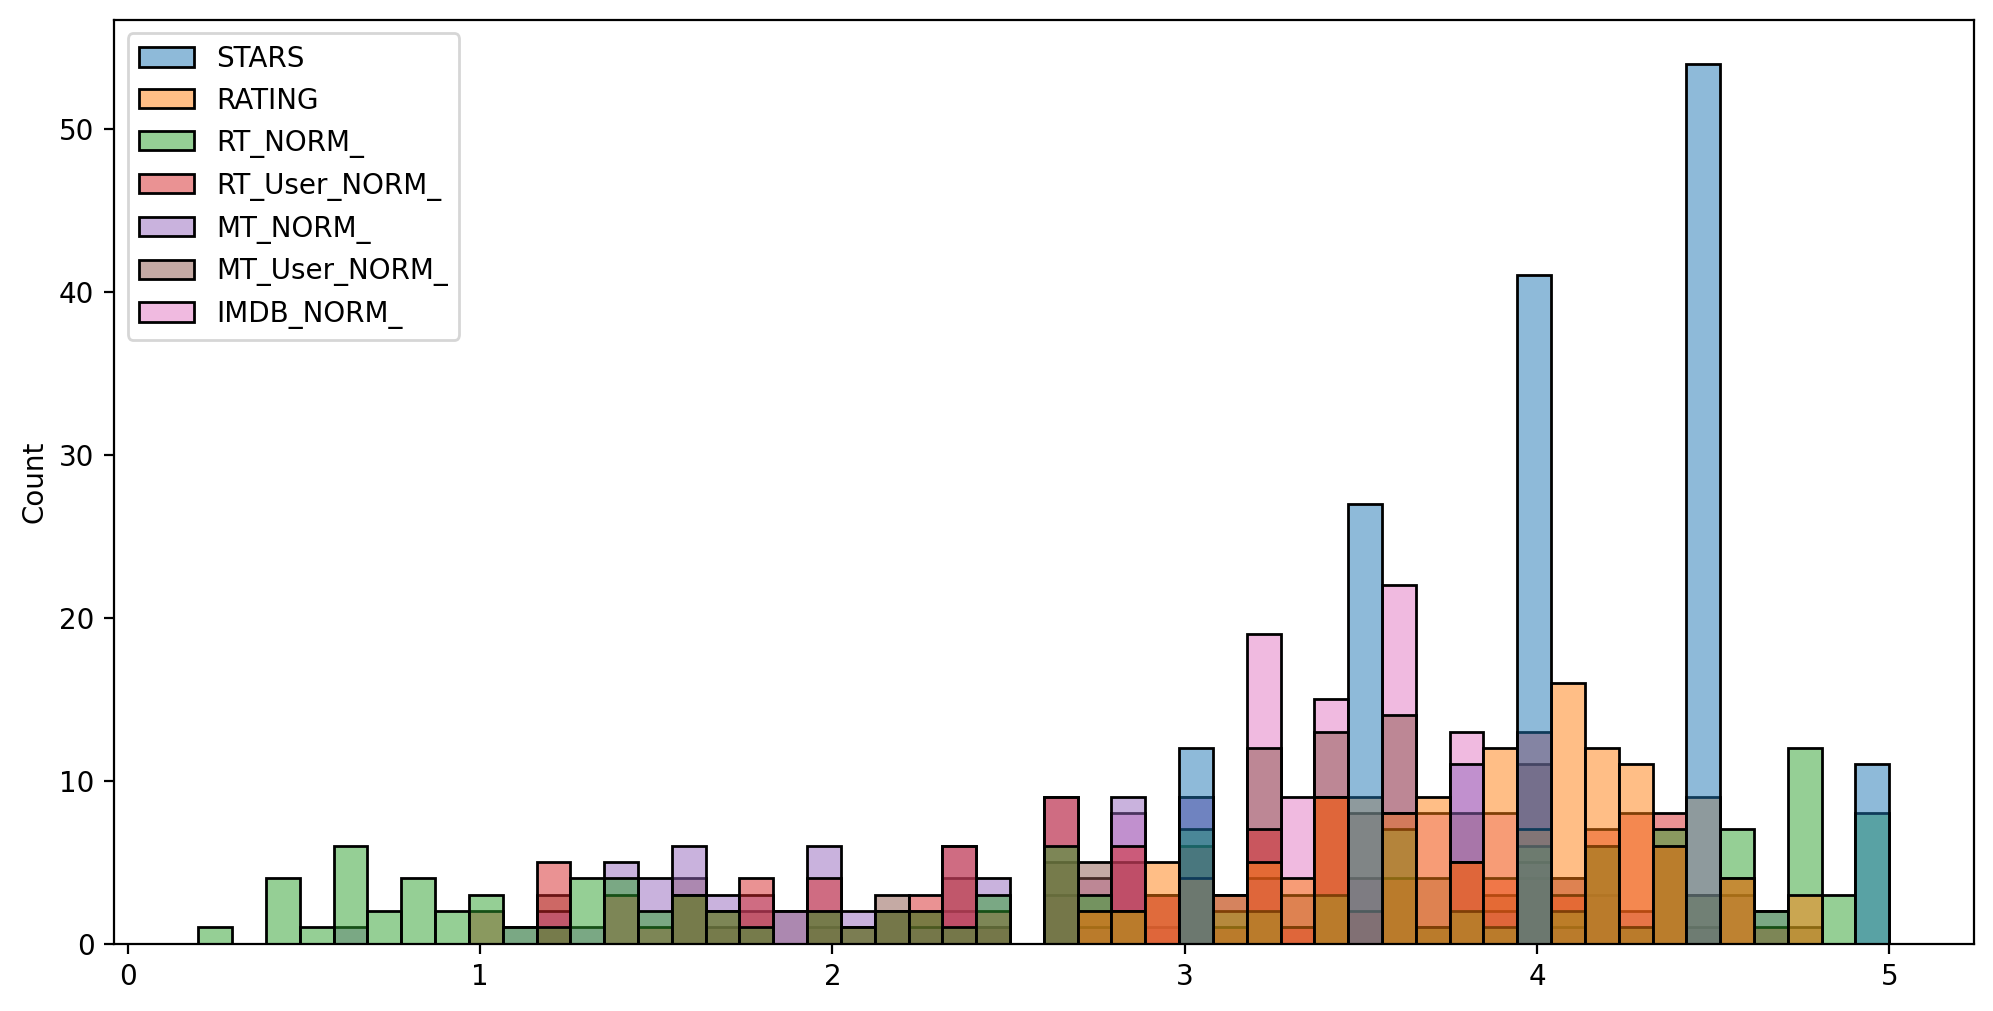

In [157]:
plt.figure(figsize=(12,6),dpi = 200)
sns.histplot(data = norm_scores, bins=50)

### Как различные компании оценивают фильмы с наименьшими рейтингами?


In [158]:
norm_scores

,STARS,RATING,RT_NORM_,RT_User_NORM_,MT_NORM_,MT_User_NORM_,IMDB_NORM_
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


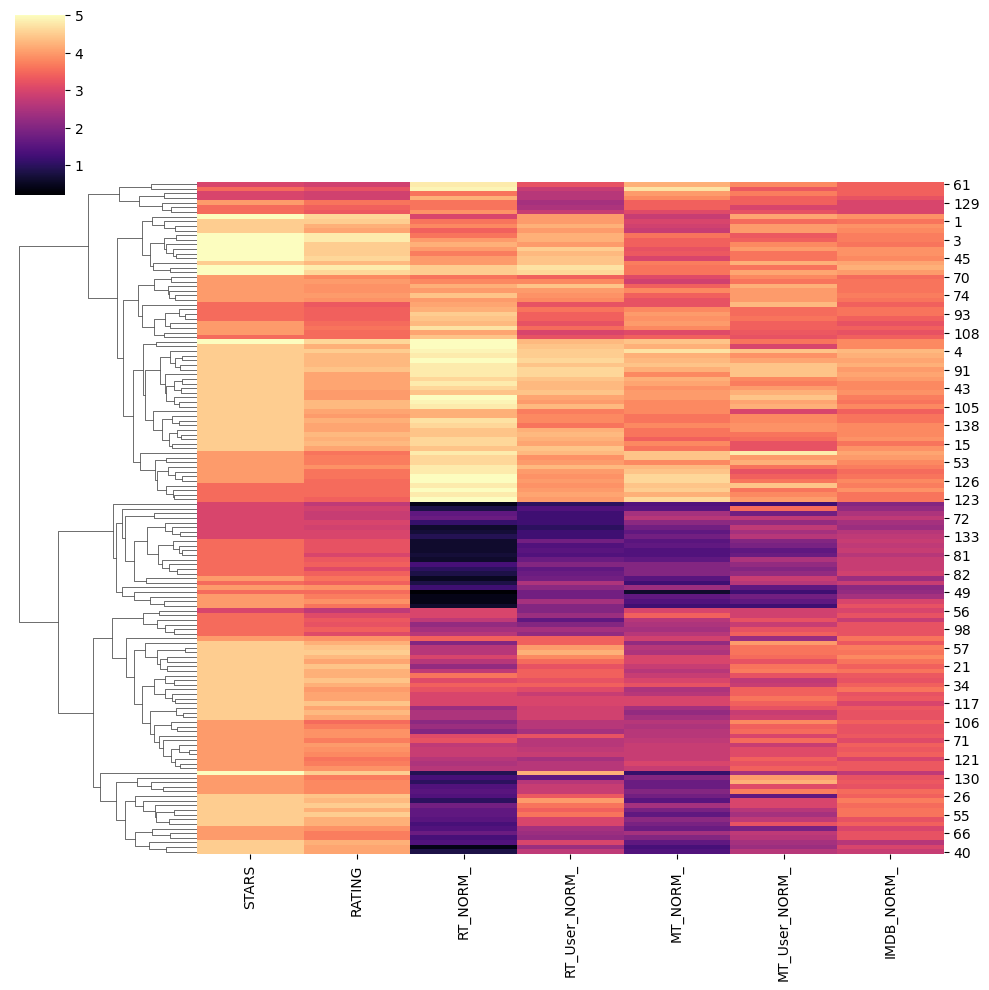

In [159]:
sns.clustermap(norm_scores, cmap = 'magma', col_cluster=False)

In [166]:
norm_films = df[['FILM','STARS', 'RATING', 'RT_NORM_', 'RT_User_NORM_', 'MT_NORM_',
       'MT_User_NORM_', 'IMDB_NORM_']]

In [167]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_NORM_', 'RT_User_NORM_', 'MT_NORM_',
       'MT_User_NORM_', 'IMDB_NORM_'],
      dtype='object')

In [168]:
norm_films

,FILM,STARS,RATING,RT_NORM_,RT_User_NORM_,MT_NORM_,MT_User_NORM_,IMDB_NORM_
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,4.8,4.3,4.3,3.6,3.7


In [174]:
worst_films = norm_films.nsmallest(10,"RT_NORM_")

/var/folders/yb/jf4_vg517clfj2xz26rr9kkr0000gn/T/ipykernel_2534/191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


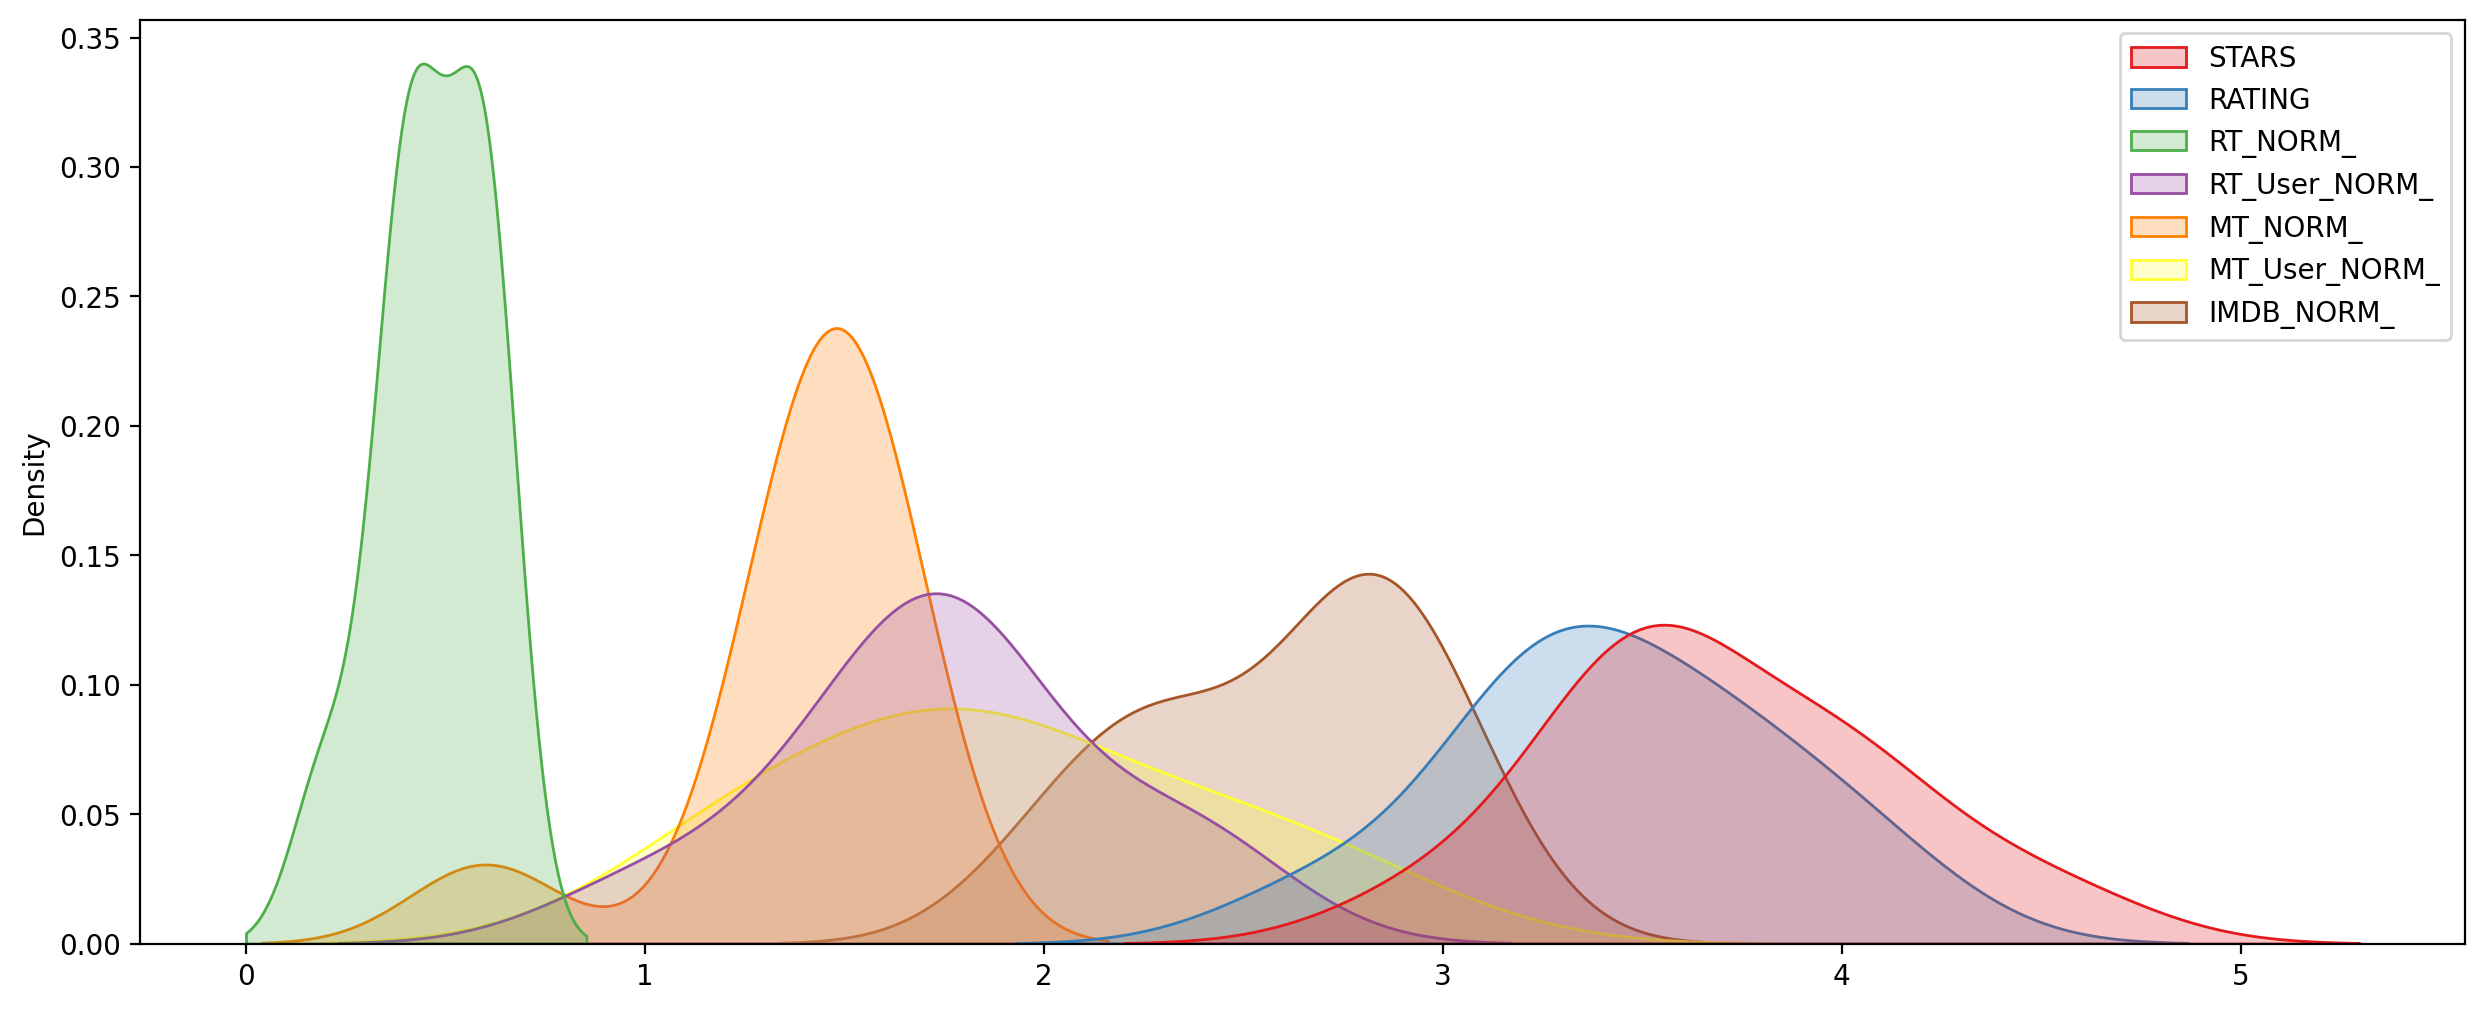

In [178]:
fig, ax =plt.subplots(figsize=(15,6),dpi = 200)

sns.kdeplot(data = worst_films, fill=True, palette='Set1', clip=[0,6])
move_legend(ax, "upper right")

In [177]:
worst_films

,FILM,STARS,RATING,RT_NORM_,RT_User_NORM_,MT_NORM_,MT_User_NORM_,IMDB_NORM_
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


**Вывод: Fandango показывал 3-4 звезды для фильмов, которые были неудачными!**  
    
**Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний!**

In [180]:
norm_films.iloc[25]

FILM             Taken 3 (2015)
STARS                       4.5
RATING                      4.1
RT_NORM_                    0.4
RT_User_NORM_               2.3
MT_NORM_                    1.3
MT_User_NORM_               2.3
IMDB_NORM_                  3.0
Name: 25, dtype: object

In [181]:
0.4+2.3+1.3+2.3+3

9.3

In [182]:
9.3/5

1.86